Cost after iteration 0: 1.368816
Learning rate after iteration 0: 0.000200
Cost after iteration 1000: 0.688173
Learning rate after iteration 1000: 0.000200
Cost after iteration 2000: 0.570295
Learning rate after iteration 2000: 0.000200
Cost after iteration 3000: 0.456534
Learning rate after iteration 3000: 0.000200
Cost after iteration 4000: 0.410062
Learning rate after iteration 4000: 0.000200
Cost after iteration 5000: 0.380939
Learning rate after iteration 5000: 0.000200
Cost after iteration 6000: 0.358900
Learning rate after iteration 6000: 0.000200
Cost after iteration 7000: 0.340171
Learning rate after iteration 7000: 0.000200
Cost after iteration 8000: 0.324200
Learning rate after iteration 8000: 0.000200
Cost after iteration 9000: 0.279655
Learning rate after iteration 9000: 0.000200
Cost after iteration 10000: 0.268023
Learning rate after iteration 10000: 0.000200
Cost after iteration 11000: 0.254734
Learning rate after iteration 11000: 0.000200
Cost after iteration 12000: 0.

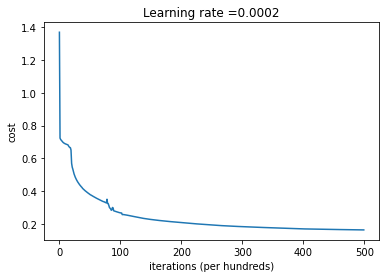

In [1]:
# Shallow Neural net with only one hidden layer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(1)


def main():
    train_x = pd.read_csv("cancer_data.csv")
    train_x = np.array(train_x)
    train_y = pd.read_csv("cancer_data_y.csv")
    train_y = np.array(train_y)

    d = model(train_x.T, train_y.T, n_h=20, num_iters=50000, alpha=0.0002, print_cost=True)


def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s


def layers(X, Y):
    """

    :param X:
    :param Y:
    :return:
    """
    n_x = X.shape[0]
    n_y = Y.shape[0]
    return n_x, n_y


def initialize(n_x, n_h, n_y):
    """

    :param n_x:
    :param n_h:
    :param n_y:
    :return:
    """
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.random.rand(n_h, 1)
    W2 = np.random.rand(n_y, n_h)
    b2 = np.random.rand(n_y, 1)
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters


def forward_prop(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache


def compute_cost(A2, Y, parameters):
    m = Y.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']
    #We know that Loss L is mathematically defined as: l(y^,y)=-[ylogy^+(1-y)log(1-y^)]
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = - np.sum(logprobs) / m
    cost = np.squeeze(cost)

    return cost


def back_prop(parameters, cache, X, Y):
    m = Y.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']

    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.square(A1))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads


def update_params(parameters, grads, alpha):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
#w=w — alpha * |dE/dw|
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters


def model(X, Y, n_h, num_iters, alpha, print_cost):
    np.random.seed(3)
    n_x = layers(X, Y)[0]
    n_y = layers(X, Y)[1]

    parameters = initialize(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    costs = []
    for i in range(0, num_iters):

        A2, cache = forward_prop(X, parameters)

        cost = compute_cost(A2, Y, parameters)
        grads = back_prop(parameters, cache, X, Y)
        if (i > 20000):
            alpha1 = (20000 / i) * alpha
            parameters = update_params(parameters, grads, alpha1)
        else:
            parameters = update_params(parameters, grads, alpha)

        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 1000 == 0:
            print("Cost after iteration %i: %f" % (i, cost))
            if i <= 20000:
                print("Learning rate after iteration %i: %f" % (i, alpha))
            else:
                print("Learning rate after iteration %i: %f" % (i, alpha1))

    X_test = pd.read_csv("test_cancer_data.csv")
    X_test = np.array(X_test)
    X_test = X_test.T
    Y_test = pd.read_csv("test_cancer_data_y.csv")
    Y_test = np.array(Y_test)
    Y_test = Y_test.T

    predictions = predict(parameters, X)
    print('Accuracy on training set: %.2f' % float(
        (np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')
    truePositive = 0
    trueNegative = 0
    falseNegative = 0
    falsePositive = 0
    predList = predictions.tolist()
    tlist = Y.tolist()

    array_length = len(predList[0])
    for i in range(array_length):
        if predList[0][i] == 1 and tlist[0][i] == 1:
            truePositive += 1
        elif predList[0][i] == 0 and tlist[0][i] == 0:
            trueNegative += 1
        elif predList[0][i] == 0 and tlist[0][i] == 1:
            falseNegative += 1
        elif predList[0][i] == 1 and tlist[0][i] == 0 :
            falsePositive += 1
        else:
            print(predList[0][i])
            print(tlist[0][i])
            print("WTF")
    tpr = truePositive / (truePositive + falseNegative) * 100
    fpr = falsePositive / (falsePositive + trueNegative) * 100
    precision = truePositive / (truePositive + falsePositive) * 100
    print("On training set:\nTrue Positive:  ", truePositive)
    print("True Negative:  ", trueNegative)
    print("False Negative:  ", falseNegative)
    print("False Positive:  ", falsePositive)
    print("True Positive Rate / Recall: %.2f" % tpr+str('%'))
    print("Precision: %.2f" %precision+str('%'))
    print("False Positive Rate / Fallout: %.2f" %fpr+str('%'))

    predictions = predict(parameters, X_test)
    print('Accuracy on test set: %.2f' % float(
        (np.dot(Y_test, predictions.T) + np.dot(1 - Y_test, 1 - predictions.T)) / float(Y_test.size) * 100) + '%')
    truePositive = 0
    trueNegative = 0
    falseNegative = 0
    falsePositive = 0
    predList = predictions.tolist()
    tlist = Y_test.tolist()

    assert (len(predictions[0])== len(tlist[0]))
    array_length = len(predList[0])
    for i in range(array_length):
        if predList[0][i] == 1 and tlist[0][i] == 1:
            truePositive += 1
        elif predList[0][i] == 0 and tlist[0][i] == 0:
            trueNegative += 1
        elif predList[0][i] == 0 and tlist[0][i] == 1:
            falseNegative += 1
        elif predList[0][i] == 1 and tlist[0][i] == 0 :
            falsePositive += 1
        else:
            print(predList[0][i])
            print(tlist[0][i])
            print("WTF")
    tpr = truePositive / (truePositive + falseNegative) * 100
    fpr = falsePositive / (falsePositive + trueNegative) * 100
    precision = truePositive / (truePositive + falsePositive) * 100
    print("On Test set:\nTrue Positive:  ", truePositive)
    print("True Negative:  ", trueNegative)
    print("False Negative:  ", falseNegative)
    print("False Positive:  ", falsePositive)
    print("True Positive Rate / Recall: %.2f" % tpr+str('%'))
    print("Precision: %.2f" %precision+str('%'))
    print("False Positive Rate / Fallout: %.2f" %fpr+str('%'))

    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(alpha))
    plt.show()

    return parameters

# predictions =  yprediction=1{activation > 0.5}={1 if activation>0.5 , 0 otherwise
## Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
def predict(parameters, X):
    A2, cache = forward_prop(X, parameters)
    predictions = np.round(A2)

    return predictions


main()
